# Feature Importance on MNIST Dataset

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


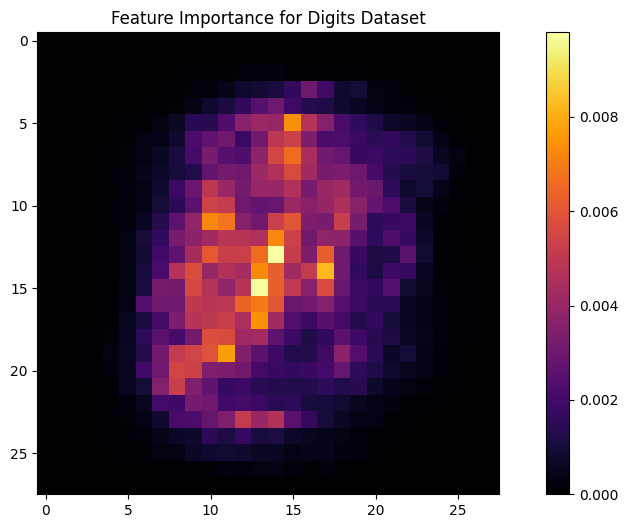

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier

# Load dataset
digits = fetch_openml('mnist_784', version=1)
X = digits.data
y = digits.target

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_.reshape((28,28))

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.imshow(importances, cmap='inferno')
plt.colorbar()
plt.title("Feature Importance for Digits Dataset")
plt.show()


#  Visualizing a Single Tree from the Forest

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
import graphviz

digits = load_digits()
X = digits.data
y = digits.target

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

dot_data = export_graphviz(
    rf.estimators_[0], 
    filled=True, 
    feature_names=digits.feature_names, 
    class_names=[str(i) for i in range(10)], 
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("random_forest_tree", format="png", cleanup=True)
graph.view() 


'random_forest_tree.pdf'

# Analyzing the Class Predictions of Individual Trees

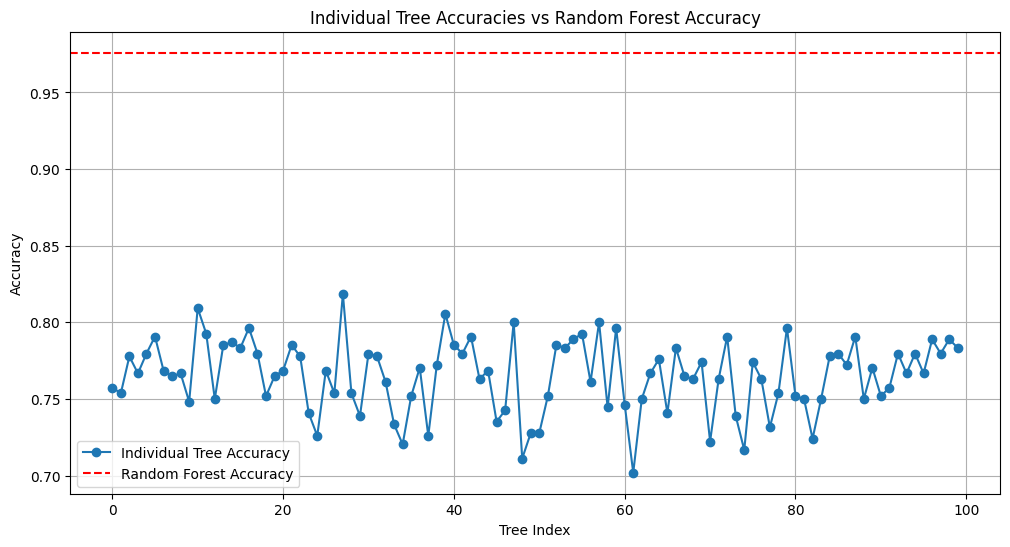

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

digits = load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

individual_tree_accuracies = []
for tree in rf.estimators_:
    y_pred_tree = tree.predict(X_test)
    tree_accuracy = accuracy_score(y_test, y_pred_tree)
    individual_tree_accuracies.append(tree_accuracy)


plt.figure(figsize=(12, 6))
plt.plot(individual_tree_accuracies, label="Individual Tree Accuracy", marker='o')
plt.axhline(y=rf_accuracy, color='r', linestyle='--', label="Random Forest Accuracy")
plt.title("Individual Tree Accuracies vs Random Forest Accuracy")
plt.xlabel("Tree Index")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# Impact of number of estimators on accuracy & computational time

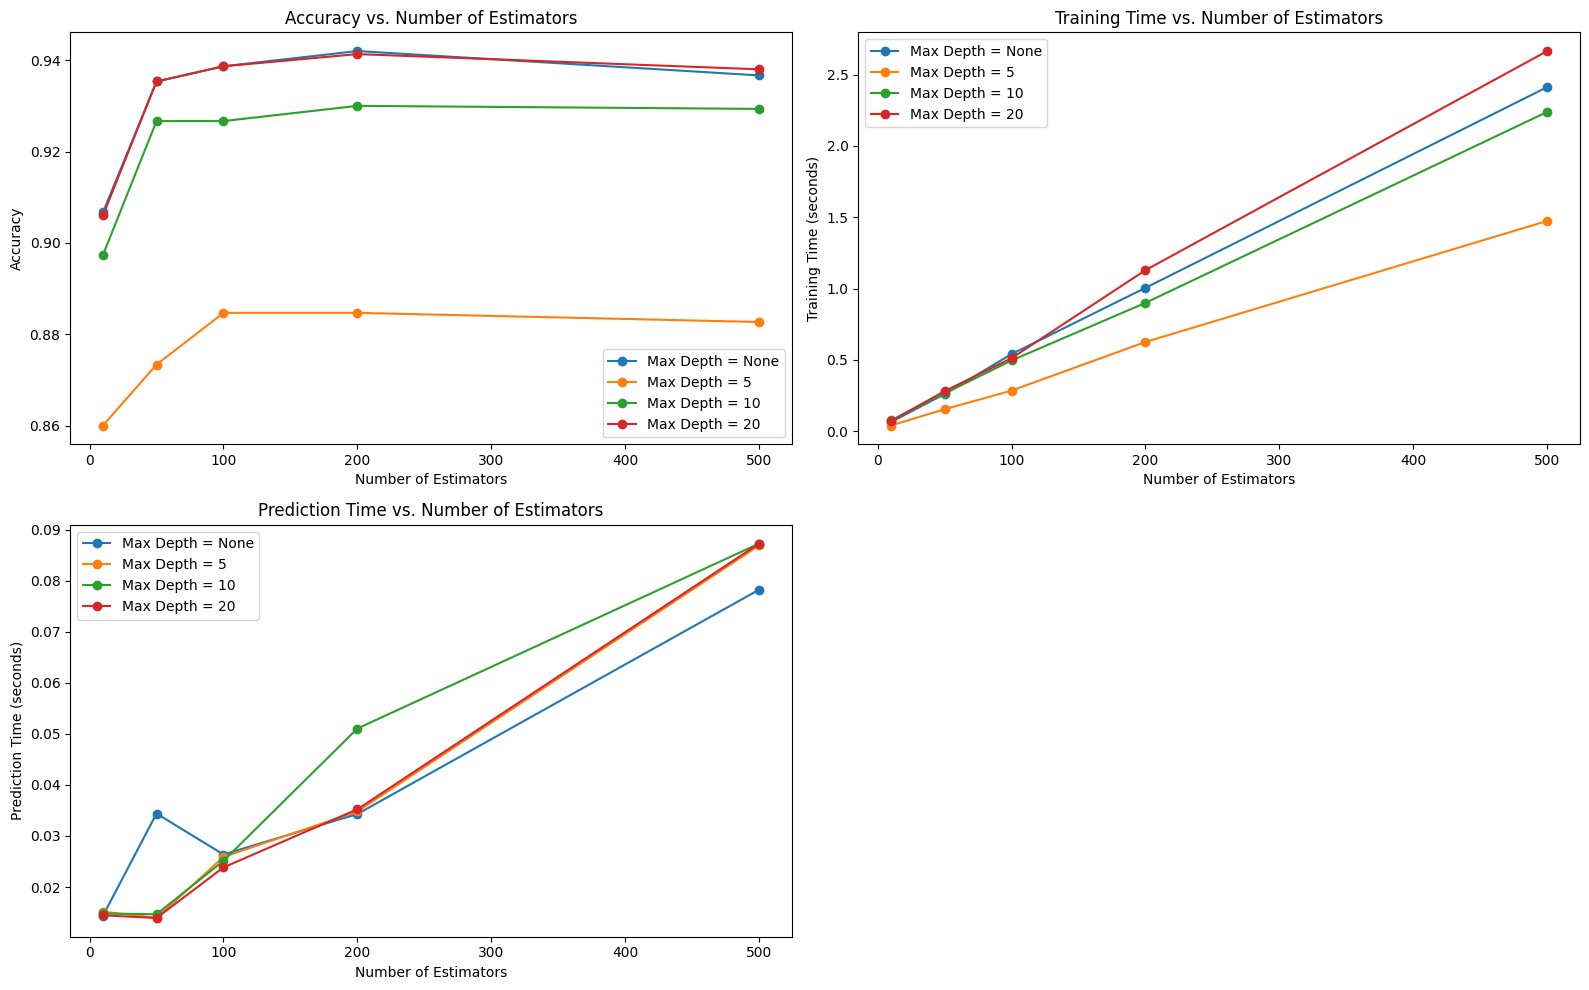

In [8]:
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=5000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Parameters to test
estimators = [10, 50, 100, 200, 500]
max_depths = [None, 5, 10, 20]  # None means no limit on depth
results = []

for max_depth in max_depths:
    train_times = []
    test_times = []
    accuracies = []
    
    for n in estimators:
        rf = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=42, n_jobs=-1)
        
        start_train = time.time()
        rf.fit(X_train, y_train)
        end_train = time.time()
        train_times.append(end_train - start_train)
        
        start_test = time.time()
        y_pred = rf.predict(X_test)
        end_test = time.time()
        test_times.append(end_test - start_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    
    results.append({
        'max_depth': max_depth,
        'estimators': estimators,
        'train_times': train_times,
        'test_times': test_times,
        'accuracies': accuracies
    })

plt.figure(figsize=(16, 10))

for i, res in enumerate(results):
    max_depth = res['max_depth']
    
    plt.subplot(2, 2, 1)
    plt.plot(res['estimators'], res['accuracies'], marker='o', label=f'Max Depth = {max_depth}')
    plt.title('Accuracy vs. Number of Estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(res['estimators'], res['train_times'], marker='o', label=f'Max Depth = {max_depth}')
    plt.title('Training Time vs. Number of Estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Training Time (seconds)')
    plt.grid()
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(res['estimators'], res['test_times'], marker='o', label=f'Max Depth = {max_depth}')
    plt.title('Prediction Time vs. Number of Estimators')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Prediction Time (seconds)')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()
